## Sufficiency and Estimation ##

In [450]:
%reset -f

from sympy import *
from sympy.stats import *
from sympy.functions.combinatorial.numbers import *

In [451]:
# Symbols

theta = Symbol('theta')
x = Symbol('x', positive=True)
n = Symbol('n', positive=True)

In [452]:
# likelihood

lhood = theta * x**(theta-1)
lhood

In [453]:
# log likelihood

logll = expand_log(log(lhood), force=True)
logll

### CRLB - Cramer-Rao Lower Bound ###
Includes log-likelihood and Fisher 

In [454]:
%reset -f

from sympy import *
from sympy.stats import *
from sympy.functions.combinatorial.numbers import *

In [455]:
# Symbols

theta = Symbol('theta', positive=True)
x = Symbol('x', positive=True)
n = Symbol('n', positive=True)

In [456]:
# likelihood

# UNCOMMENT here to use an inbuilt distribution
#X = Normal('x', 0, theta)
#lhood = simplify(density(X)(x))

# UNCOMMENT here to define manually
lhood = theta*exp((theta-1)*log(x))

lhood

In [457]:
# log likelihood

logl = expand_log(log(lhood), force=True)
logl

In [458]:
# first derivative of logl wrt theta

diff1 = diff(logl, theta)
diff1

In [459]:
# second derivative of logl wrt theta

diff2 = diff(diff1, theta)
diff2

In [460]:
# Fisher information I(theta)
# sub theta into x and simplify

fisher = -simplify(diff2.subs(x, theta))
fisher

In [461]:
# CRLB

# function of theta
tau = theta**2

crlb = diff(tau, theta)**2 / (n*fisher)
crlb

### Score and CRLB Attainability ###
Includes score for 1 RV and n RVs

In [462]:
%reset -f

from sympy import *
from sympy.stats import *
from sympy.functions.combinatorial.numbers import *

In [463]:
# Symbols

theta = Symbol('theta', positive=True)
x = Symbol('x', positive=True)
n = Symbol('n', positive=True)

In [464]:
# likelihood

# UNCOMMENT here to use an inbuilt distribution
#X = Normal('x', 0, theta)
#lhood = simplify(density(X)(x))

# UNCOMMENT here to define manually
lhood = theta*exp((theta-1)*log(x))

lhood

In [465]:
# log likelihood

logl = expand_log(log(lhood), force=True)
logl

In [466]:
# score for 1 RV
# first derivative of logl wrt theta

score = diff(logl, theta)
score

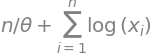

In [467]:
# score for n RVs

i = Symbol('i')
xi = Indexed('x', i) # need indexed variable for summation and product

score = score.subs(x, xi)
sum_x = Sum(score, (i, 1, n))
sum_x = simplify(sum_x).doit()
score = ratsimp(sum_x).doit()

score

### Maximum Likelihood Estimator ###
Takes derivative of log-likelihood and solves for parameter to yield statistic

In [468]:
%reset -f

from sympy import *
from sympy.stats import *
from sympy.functions.combinatorial.numbers import *

In [469]:
# Symbols

theta = Symbol('theta', positive=True)
i = Symbol('i', positive=True, Set=S.Naturals)
x = Indexed('x', i) # need indexed variable for summation and product
n = Symbol('n', positive=True, Set=S.Naturals)

In [470]:
# likelihood for 1 RV

# UNCOMMENT here to use an inbuilt distribution
#X = Normal('x', 0, theta)
#lhood = simplify(density(X)(x))

# UNCOMMENT here to define manually
lhood = theta*exp((theta-1)*log(x))

lhood

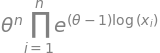

In [471]:
# likelihood for n RVs

lhood = Product(lhood, (i, 1, n)).doit()

lhood

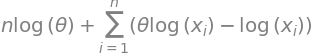

In [472]:
# log likelihood

# either do expand() or expand_log() here
logl = expand(log(lhood), force=True)
logl

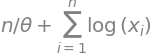

In [473]:
# derivative of logl
# theoretically then set to zero to obtain conditions for maximum likelihood

diff1 = simplify(diff(logl, theta))
diff1

In [474]:
# solve for theta to identify MLE

mle = solve(diff1, theta)
pprint(mle)

⎡      -n       ⎤
⎢───────────────⎥
⎢  n            ⎥
⎢ ___           ⎥
⎢ ╲             ⎥
⎢  ╲            ⎥
⎢  ╱   log(x[i])⎥
⎢ ╱             ⎥
⎢ ‾‾‾           ⎥
⎣i = 1          ⎦


### Monotone Likelihood Ratio (MLR) Test ###

In [496]:
%reset -f

from sympy import *
from sympy.stats import *
from sympy.functions.combinatorial.numbers import *

In [497]:
# Symbols

theta = Symbol('theta', positive=True)
i = Symbol('i', positive=True, Set=S.Naturals)
x = Indexed('x', i) # need indexed variable for summation and product
n = Symbol('n', positive=True, Set=S.Naturals)

t1 = Symbol('theta1')
t2 = Symbol('theta2')

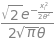

In [498]:
# likelihood for 1 RV

# UNCOMMENT here to use an inbuilt distribution
X = Normal('x', 0, theta)
lhood = simplify(density(X)(x))

# UNCOMMENT here to define manually
#lhood = theta*exp((theta-1)*log(x))

lhood

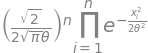

In [499]:
# likelihood for n RVs

lhood = Product(lhood, (i, 1, n)).doit()

lhood

In [500]:
# sub in t1 and t2
lhood1 = lhood.subs(theta, t1)
lhood2 = lhood.subs(theta, t2)

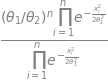

In [502]:
# do the ratio
# then assess whether it's increasing wrt T

# can do simplify() or powsimp()
powsimp(lhood2/lhood1, force=True)